In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\Swastick College/7th Sem\Adv Data MIning\ADM LAB\Stock Market Data\ADANIPORTS copy.csv')

# Display basic info and first few rows
print(data.info())
print(data.head())


c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [2]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Handle missing values in 'Trades' column by filling with the median
data['Trades'] = data['Trades'].fillna(data['Trades'].median())

# Check if the changes were applied
print(data.head())


        Date  Prev Close    Open     High    Low   Last   Close    VWAP  \
0 2007-11-27      440.00  770.00  1050.00  770.0  959.0  962.90  984.72   
1 2007-11-28      962.90  984.00   990.00  874.0  885.0  893.90  941.38   
2 2007-11-29      893.90  909.00   914.75  841.0  887.0  884.20  888.09   
3 2007-11-30      884.20  890.00   958.00  890.0  929.0  921.55  929.17   
4 2007-12-03      921.55  939.75   995.00  922.0  980.0  969.30  965.65   

     Volume      Turnover   Trades  Deliverable Volume  %Deliverble  
0  27294366  2.687720e+15  35881.5             9859619       0.3612  
1   4581338  4.312770e+14  35881.5             1453278       0.3172  
2   5124121  4.550660e+14  35881.5             1069678       0.2088  
3   4609762  4.283260e+14  35881.5             1260913       0.2735  
4   2977470  2.875200e+14  35881.5              816123       0.2741  


C:\Users\IDEAPAD GAMING\AppData\Local\Temp\ipykernel_23600\3750361203.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


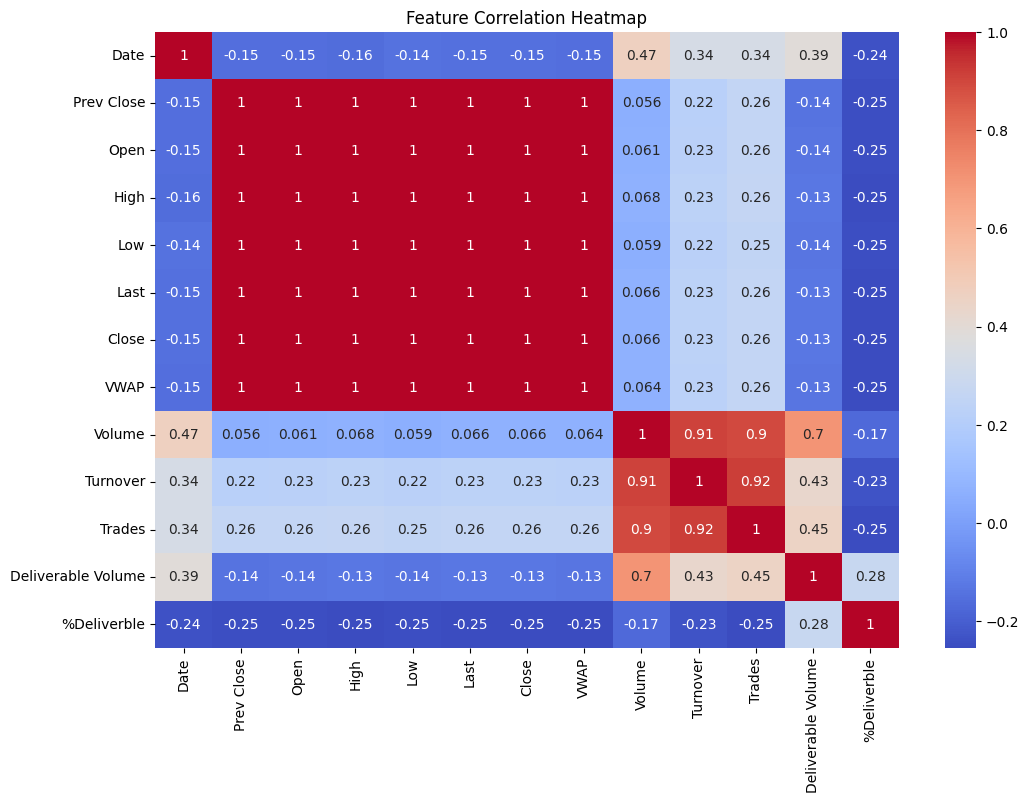

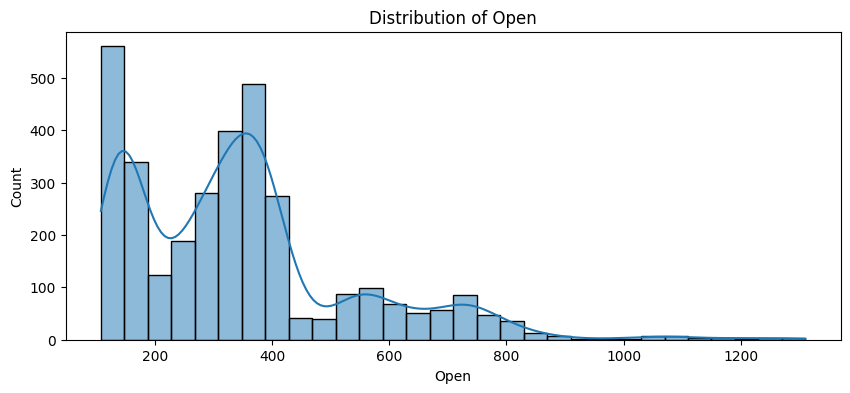

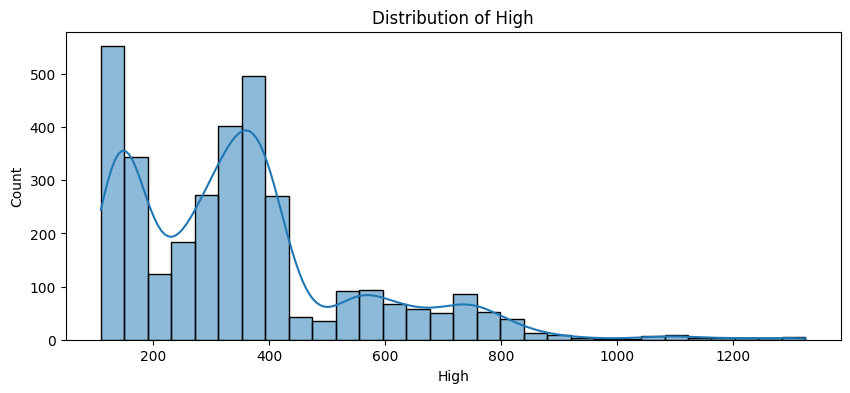

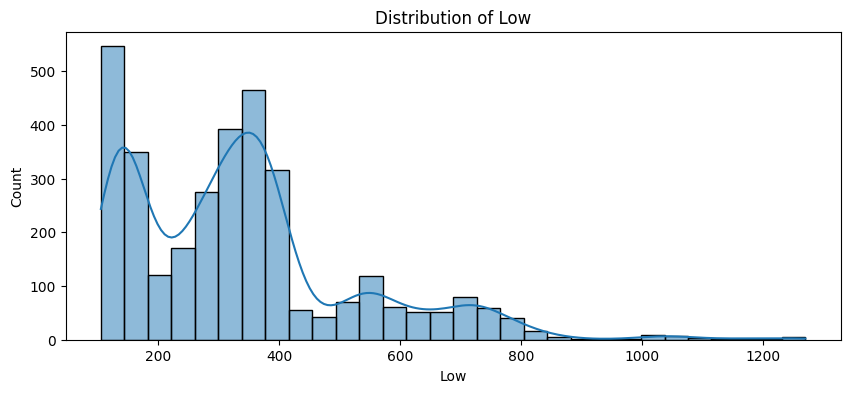

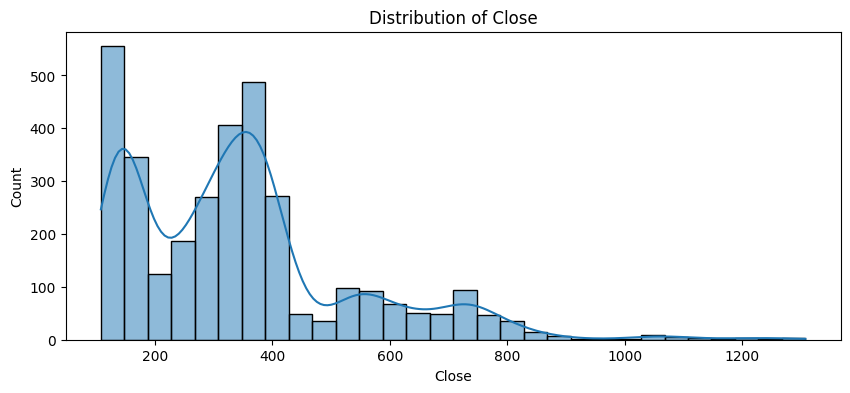

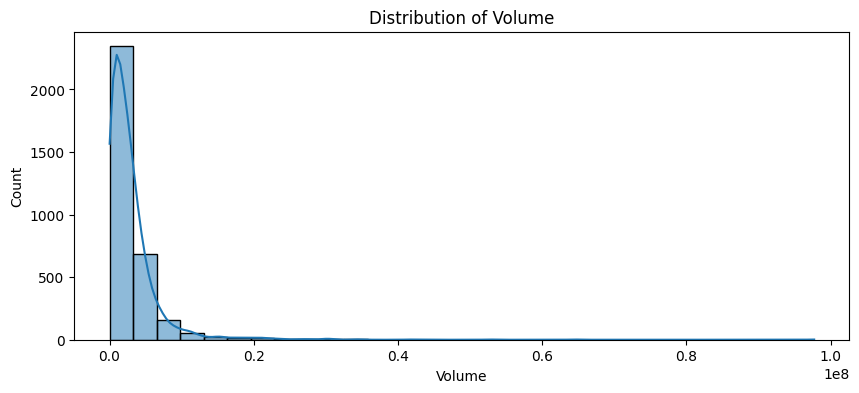

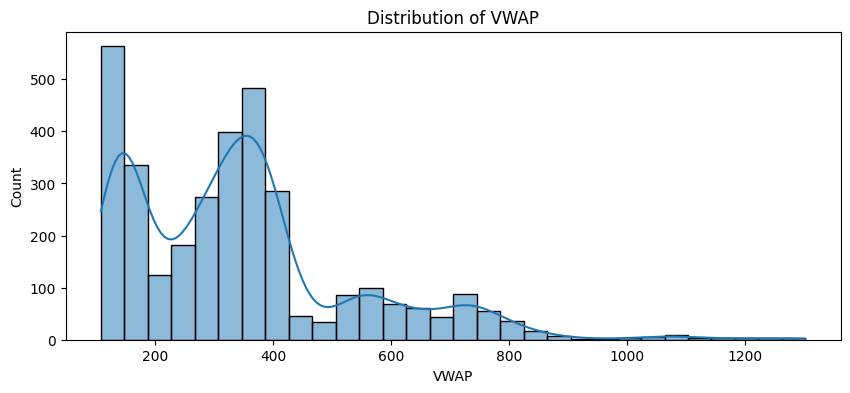

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot distribution for some key variables
for feature in ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [4]:
# Calculate Moving Averages (SMA, EMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()   # 20-day Simple Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Check the new features
print(data[['SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line']].head())


   SMA_20      EMA_20  RSI       MACD  Signal_Line
0     NaN  962.900000  NaN   0.000000     0.000000
1     NaN  956.328571  NaN  -5.504274    -1.100855
2     NaN  949.459184  NaN -10.527801    -2.986244
3     NaN  946.801166  NaN -11.364151    -4.661825
4     NaN  948.943912  NaN  -8.080788    -5.345618


In [5]:
from sklearn.preprocessing import MinMaxScaler

# List of features to normalize (you can adjust this list based on the selected features)
features_to_normalize = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover', 'SMA_20', 'EMA_20', 'RSI', 'MACD']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Check normalization
print(data[features_to_normalize].head())


       Open      High       Low     Close      VWAP    Volume  Turnover  \
0  0.550634  0.774216  0.570576  0.712743  0.734103  0.279227  0.329318   
1  0.728634  0.724774  0.659896  0.655217  0.697799  0.046763  0.052818   
2  0.666251  0.662766  0.631554  0.647130  0.653161  0.052318  0.055733   
3  0.650447  0.698406  0.673638  0.678269  0.687572  0.047054  0.052457   
4  0.691828  0.728895  0.701121  0.718079  0.718129  0.030347  0.035202   

   SMA_20    EMA_20  RSI      MACD  
0     NaN  0.799661  NaN  0.692862  
1     NaN  0.793472  NaN  0.670620  
2     NaN  0.787003  NaN  0.650321  
3     NaN  0.784500  NaN  0.646942  
4     NaN  0.786518  NaN  0.660209  


In [6]:
from sklearn.preprocessing import MinMaxScaler

# List of features to normalize (you can adjust this list based on the selected features)
features_to_normalize = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover', 'SMA_20', 'EMA_20', 'RSI', 'MACD']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Check normalization
print(data[features_to_normalize].head())


       Open      High       Low     Close      VWAP    Volume  Turnover  \
0  0.550634  0.774216  0.570576  0.712743  0.734103  0.279227  0.329318   
1  0.728634  0.724774  0.659896  0.655217  0.697799  0.046763  0.052818   
2  0.666251  0.662766  0.631554  0.647130  0.653161  0.052318  0.055733   
3  0.650447  0.698406  0.673638  0.678269  0.687572  0.047054  0.052457   
4  0.691828  0.728895  0.701121  0.718079  0.718129  0.030347  0.035202   

   SMA_20    EMA_20  RSI      MACD  
0     NaN  0.799661  NaN  0.692862  
1     NaN  0.793472  NaN  0.670620  
2     NaN  0.787003  NaN  0.650321  
3     NaN  0.784500  NaN  0.646942  
4     NaN  0.786518  NaN  0.660209  


In [7]:
# Ensure the data is sorted by date
data = data.sort_values(by='Date')

# Define a 12-month window size (approx. 252 trading days)
window_size = 5

# Create rolling windows for the target variable ('Close' in this case)
# You'll need to shift the target variable for future prediction
data['Target'] = data['Close'].shift(-window_size)

# Drop any rows with NaN values after the shift
data = data.dropna()

# Check the data with the target column
print(data[['Date', 'Close', 'Target']].tail())


           Date     Close    Target
3312 2021-04-16  0.539831  0.519196
3313 2021-04-19  0.511026  0.534537
3314 2021-04-20  0.510609  0.532119
3315 2021-04-22  0.525074  0.532536
3316 2021-04-23  0.514694  0.518613


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[features_to_normalize]
y = data['Target']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.000786607215904741
R^2 Score: 0.9638592847033066


In [9]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize individual models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Ensemble with Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('et', et_model),
    ('gb', gb_model)
])

# Train and evaluate the ensemble model
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Mean Squared Error: {mse_ensemble}")
print(f"Ensemble R^2 Score: {r2_ensemble}")



Ensemble Mean Squared Error: 0.0007643274900879897
Ensemble R^2 Score: 0.9648829280304345


In [10]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")


XGBoost Mean Squared Error: 0.0008491913244788489
XGBoost R^2 Score: 0.960983854114391


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

# Define base models and a meta-model (e.g., Linear Regression)
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

# Stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking Mean Squared Error: {mse_stack}")
print(f"Stacking R^2 Score: {r2_stack}")


Stacking Mean Squared Error: 0.0007230565106003797
Stacking R^2 Score: 0.9667791256364555


In [27]:
# Create a DataFrame for comparison after making predictions
results = pd.DataFrame({
    'Date': data['Date'][y_test.index],  # Ensure these dates match the test set
    'Actual': y_test,
    'Predicted': y_pred_stack  # Using the predictions from your stacking model
})

# Sort results by Date for sequential plotting (optional but recommended)
results = results.sort_values(by='Date')



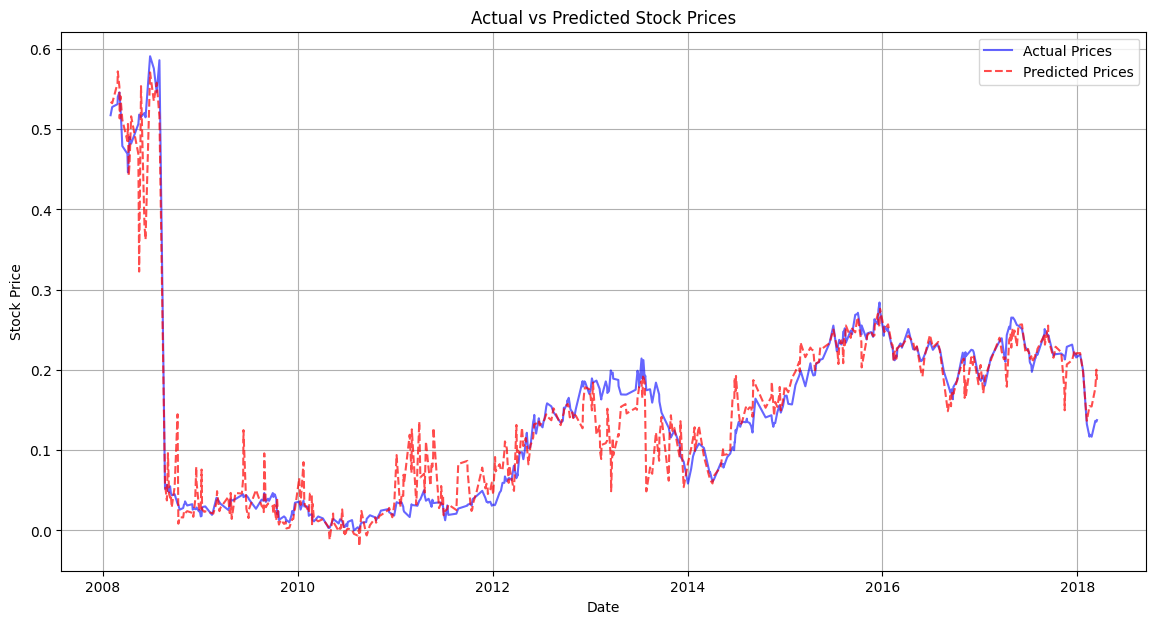

In [28]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(results['Date'], results['Predicted'], label='Predicted Prices', color='red', linestyle='--', alpha=0.7)

# Enhancing the plot
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
